In [68]:
from qutip import *
import numpy as np

# couple two mdoes with tunable truncation. diagonalize it, map dressed states back to bare states 
# find the kerr (2nd level - 1st level) - (1st kerr - 0th level) for both modes. do all of this 
# in qutip ; add lots of comments
# Parameters
N1 = 5  # Truncation for mode 1
N2 = 5 # Truncation for mode 2
w1 = 4.9 * 1e3* 2*np.pi  # Frequency of mode 1
w2 = 6.5 * 1e3* 2*np.pi  # Frequency of mode 2
g = 0.2 * 1e3* 2*np.pi  # Coupling strength
alpha1 = 0 # Anharmonicity (Kerr) for mode 1
alpha2 = 0  # Anharmonicity (Kerr) for mode 2

# Creation and annihilation operators
a1 = destroy(N1)
a2 = destroy(N2)

# Identity operators
I1 = qeye(N1)
I2 = qeye(N2)

# Tensor operators for the full Hilbert space
a1_full = tensor(a1, I2)
a2_full = tensor(I1, a2)

# Bare Hamiltonian for each mode (including Kerr nonlinearity)
H1 = w1 * a1_full.dag() * a1_full #+ 0.5 * alpha1 * a1_full.dag() * a1_full.dag() * a1_full * a1_full
H2 = w2 * a2_full.dag() * a2_full #+ 0.5 * alpha2 * a2_full.dag() * a2_full.dag() * a2_full * a2_full

# Coupling term (beam-splitter type)
# H_coupling = g * (a1_full.dag() * a2_full + a1_full * a2_full.dag())
H_coupling = g* (a1_full + a1_full.dag()) * (a2_full + a2_full.dag())  # Ensure Hermitian

# Total Hamiltonian
H = H1 + H2 + H_coupling

# Diagonalize the Hamiltonian
eigenvals, eigenstates = H.eigenstates()

# Map dressed states back to bare states: calculate overlaps
# We'll use the bare basis |n1, n2> for n1 in 0..N1-1, n2 in 0..N2-1
bare_states = [tensor(b1, b2) for b1 in [a1.dag()**n1 * a1**0 / np.sqrt(np.math.factorial(n1)) for n1 in range(N1)]
                                  for b2 in [a2.dag()**n2 * a2**0 / np.sqrt(np.math.factorial(n2)) for n2 in range(N2)]]

# Find the Kerr for each mode:
# Kerr = (E_2 - E_1) - (E_1 - E_0) for the relevant ladder
# We'll assume the lowest three eigenvalues correspond to the ground, first, and second excited states of the mode of interest

# For mode 1: states with (n1, n2) = (0,0), (1,0), (2,0)
# For mode 2: states with (n1, n2) = (0,0), (0,1), (0,2)

# Find which eigenstates have the largest overlap with each bare state
def find_state_index(target_state):
    overlaps = [abs((target_state.dag() * e)) for e in eigenstates]
    return np.argmax(overlaps)

# Mode 1 Kerr
idx_00 = find_state_index(tensor(basis(N1,0), basis(N2,0)))
idx_10 = find_state_index(tensor(basis(N1,1), basis(N2,0)))
idx_20 = find_state_index(tensor(basis(N1,2), basis(N2,0)))
idx_11 = find_state_index(tensor(basis(N1,1), basis(N2,1)))
kerr1 = (eigenvals[idx_20] - eigenvals[idx_10]) - (eigenvals[idx_10] - eigenvals[idx_00])

# Mode 2 Kerr
idx_01 = find_state_index(tensor(basis(N1,0), basis(N2,1)))
idx_02 = find_state_index(tensor(basis(N1,0), basis(N2,2)))
kerr2 = (eigenvals[idx_02] - eigenvals[idx_01]) - (eigenvals[idx_01] - eigenvals[idx_00])

print(f"Mode 1 Kerr: {kerr1:.9f}")
print(f"Mode 2 Kerr: {kerr2:.9f}")

# Print the eigenvalues and the corresponding dressed states and also associate ket string |n1, n2> for clarity
# Only print eigenstates corresponding to up to 2 photons in either mode
for n1 in range(3):
    for n2 in range(3):
        idx = find_state_index(tensor(basis(N1, n1), basis(N2, n2)))
        val = eigenvals[idx]
        print(f"Eigenvalue (|{n1},{n2}>): {val/2/np.pi:.9f}, Index: {idx}")
# for i, (val, state) in enumerate(zip(eigenvals, eigenstates)):
#     ket_str = ''.join([f'|{n1},{n2}>' for n1 in range(N1) for n2 in range(N2) if find_state_index(tensor(basis(N1, n1), basis(N2, n2))) == i])
#     print(f"Eigenvalue {i}: {val:.9f}, Corresponding Ket: {ket_str}")

# Comments:
# - This code builds a coupled two-mode system with tunable truncation and Kerr nonlinearities.
# - The Hamiltonian is diagonalized to obtain dressed states.
# - Dressed states are mapped back to bare states by overlap.
# - Kerr for each mode is extracted from the dressed spectrum.

Mode 1 Kerr: 0.000372148
Mode 2 Kerr: 0.000259294
Eigenvalue (|0,0>): -3.514272997, Index: 0
Eigenvalue (|0,1>): 6517.623115067, Index: 2
Eigenvalue (|0,2>): 13038.760544398, Index: 5
Eigenvalue (|1,0>): 4868.319793001, Index: 1
Eigenvalue (|1,1>): 11389.457183992, Index: 4
Eigenvalue (|1,2>): 17910.597093029, Index: 8
Eigenvalue (|2,0>): 9740.153918228, Index: 3
Eigenvalue (|2,1>): 16261.292657245, Index: 7
Eigenvalue (|2,2>): 22782.491972748, Index: 12


C:\Users\eeshg\AppData\Local\Temp\ipykernel_5052\4142462597.py:44: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  bare_states = [tensor(b1, b2) for b1 in [a1.dag()**n1 * a1**0 / np.sqrt(np.math.factorial(n1)) for n1 in range(N1)]
C:\Users\eeshg\AppData\Local\Temp\ipykernel_5052\4142462597.py:45: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  for b2 in [a2.dag()**n2 * a2**0 / np.sqrt(np.math.factorial(n2)) for n2 in range(N2)]]


In [50]:
print(f"idx_00: {idx_00}")
print(f"idx_01: {idx_01}")
print(f"idx_02: {idx_02}")
print(f"idx_10: {idx_10}")
print(f"idx_11: {idx_11}")
print(f"idx_20: {idx_20}")

idx_00: 0
idx_01: 2
idx_02: 4
idx_10: 1
idx_11: 3
idx_20: 4


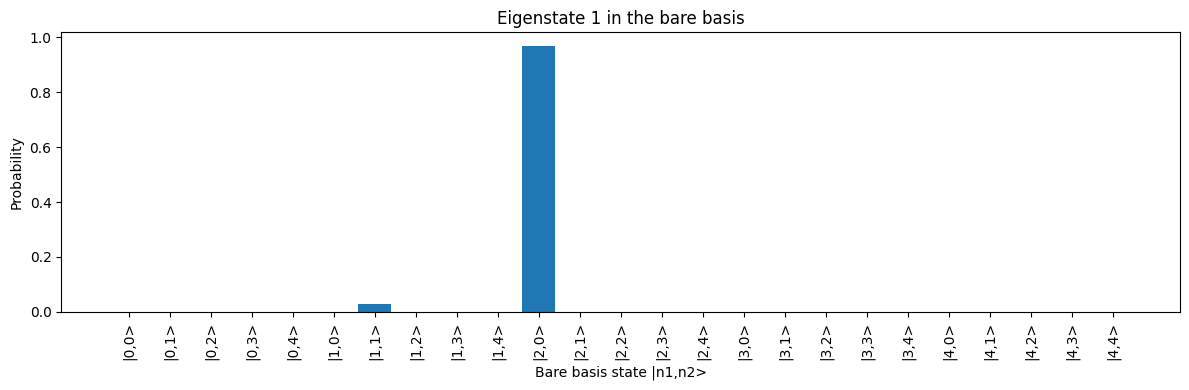

In [67]:
# Plot the eigenstate 1 in the bare basis

import matplotlib.pyplot as plt

# eigenstates[1] is the first excited state (index 1)
state = eigenstates[idx_20]

# Compute amplitudes in the bare basis
bare_basis = [tensor(basis(N1, n1), basis(N2, n2)) for n1 in range(N1) for n2 in range(N2)]
amplitudes = [abs((b.dag() * state))**2 for b in bare_basis]

# Prepare labels for the bare basis states
labels = [f"|{n1},{n2}>" for n1 in range(N1) for n2 in range(N2)]

plt.figure(figsize=(12,4))
plt.bar(range(len(amplitudes)), amplitudes)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel("Bare basis state |n1,n2>")
plt.ylabel("Probability")
plt.title("Eigenstate 1 in the bare basis")
plt.tight_layout()
plt.show()

In [37]:
idx_20

4